# Neural Network Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1. 데이터 읽어오기

In [2]:
data_path = "data/abalone.csv"
label_path = "data/abalone_attributes.txt"

col = list()

with open( label_path,'r') as f:
    col = f.read().split('\n') 

#Sex 변수 제거
abalone_data = pd.read_csv(data_path , names=col)
del abalone_data["Sex"]
abalone_data.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


## 1.2. train data : test data = 7 : 3 분할

In [3]:
n_data = abalone_data.shape[0] #4177
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print('n:data:',n_data, '/ n_trn:',n_trn,'/ n_tst:', n_tst)

n:data: 4177 / n_trn: 2924 / n_tst: 1253


## 1.3. Random Permutation을 통해 index 계산

In [4]:
idx_data = pd.Series(range(0,4177))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

[2164 1144 2879 ...  720 1046 1854]


In [5]:
idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print('trn_size: ', idx_trn.size, '/ tst_size',idx_tst.size)

trn_size:  2924 / tst_size 1253


## 1.4. X = 'index 0~6' / Y = 'index 7'

In [6]:
trnx = abalone_data.iloc[idx_trn, 0:7]
trny = abalone_data.iloc[idx_trn, 7]
tstx = abalone_data.iloc[idx_tst, 0:7]
tsty = abalone_data.iloc[idx_tst, 7]

## 2.1. Neural Network Regression 모델

In [7]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)
nn_model.fit(X=trnx, y=trny)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
nn_pred = nn_model.predict(X=tstx)
print(nn_pred)

[11.17022109  8.3087838  10.39686533 ...  4.66148505 12.3570881
 11.04721669]


## 2.2. test data - Neural Network Regression Graph

[131827.27661764]


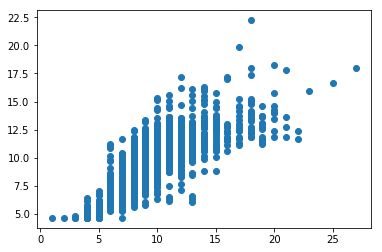

In [10]:
plt.scatter(x = tsty, y= nn_pred)
print(np.correlate(tsty, nn_pred))

## 2.3. 성능지표

In [21]:
from sklearn import metrics
#print("RMSE: ", np.sqrt(metrics.mean_squared_error(nn_pred, tsty)))
print("Test R2 score: ", format(metrics.r2_score(tsty, nn_pred),".3f"))

Test R2 score:  0.567
